In [39]:
# load appropriate libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [40]:
# load data
data = pd.read_csv(r"C:\Users\James\Documents\tips.csv",index_col='UID',encoding = "ISO-8859-1")
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of         ID     Tipster        Date          Track               Horse  \
UID                                                                     
1        1   Tipster A  24/07/2015          Ascot           Fredricka   
2        2   Tipster A  24/07/2015         Thirsk       Spend A Penny   
3        3   Tipster A  24/07/2015           York   Straightothepoint   
4        4   Tipster A  24/07/2015      Newmarket      Miss Inga Sock   
5        5   Tipster A  25/07/2015          Ascot               Peril   
6        6   Tipster A  25/07/2015           York             Aldreth   
7        7   Tipster A  25/07/2015      Newcastle        Niceonemyson   
8        8   Tipster A  25/07/2015      Lingfield      Brandon Castle   
9        9   Tipster A  26/07/2015       Carlisle          Sands Time   
10      10   Tipster A  26/07/2015     Pontefract          Ad Dabaran   
11      11   Tipster A  26/07/2015      Uttoxeter          Milgen Bay   
12      12   Tipster 

In [41]:
# Verify data types
df.dtypes

ID                 int64
Tipster           object
Date              object
Track             object
Horse             object
Bet Type          object
Odds             float64
Result            object
TipsterActive       bool
dtype: object

In [42]:
# Check for null values
df.isnull()

,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
UID,,,,,,,,,
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [43]:
df.Tipster.unique()

array(['Tipster A', 'Tipster B', 'Tipster C', 'Tipster D', 'Tipster E',
       'Tipster F', 'Tipster G', 'Tipster H', 'Tipster I', 'Tipster J',
       'Tipster K', 'Tipster L', 'Tipster M', 'Tipster N', 'Tipster O',
       'Tipster P', 'Tipster Q', 'Tipster R', 'Tipster S', 'Tipster T',
       'Tipster U', 'Tipster V', 'Tipster W', 'Tipster X', 'Tipster Y',
       'Tipster Z', 'Tipster A1', 'Tipster B1', 'Tipster C1', 'Tipster D1',
       'Tipster E1'], dtype=object)

In [44]:
# Convert Result column to binary variable
from sklearn.preprocessing import LabelEncoder
binary = LabelEncoder()
categorical = ['Result', 'TipsterActive']
for var in categorical:
    df[var] = binary.fit_transform(df[var])

df.TipsterActive.value_counts()

1    25186
0    13062
Name: TipsterActive, dtype: int64

In [45]:
df.TipsterActive.value_counts() / df.TipsterActive.shape[0]*100

1    65.849195
0    34.150805
Name: TipsterActive, dtype: float64

In [46]:
df.Result.value_counts()

0    30565
1     7683
Name: Result, dtype: int64

In [47]:
# Overall win/loss
df.Result.value_counts() / df.TipsterActive.shape[0]*100

0    79.912675
1    20.087325
Name: Result, dtype: float64

In [48]:
win_loss = pd.crosstab(df['Tipster'], df['Result'])
win_loss

Result,0,1
Tipster,,
Tipster A,839,492
Tipster A1,2107,339
Tipster B,417,86
Tipster B1,1812,685
Tipster C,1312,426
Tipster C1,392,109
Tipster D,645,96
Tipster D1,1771,348
Tipster E,2761,939


In [49]:
ct = pd.crosstab(df['Tipster'], df['Result'],normalize='index')
ct

Result,0,1
Tipster,,
Tipster A,0.630353,0.369647
Tipster A1,0.861406,0.138594
Tipster B,0.829026,0.170974
Tipster B1,0.725671,0.274329
Tipster C,0.754891,0.245109
Tipster C1,0.782435,0.217565
Tipster D,0.870445,0.129555
Tipster D1,0.835772,0.164228
Tipster E,0.746216,0.253784


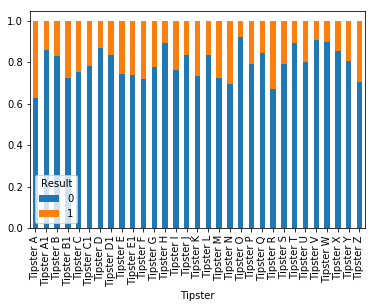

In [50]:
# Overall Win / Loss %
plt.gcf().set_size_inches(100, 40)
ct.plot(kind='bar',stacked=True)
plt.show()

In [51]:
# Average Odds per Tipster
tipster_names = df.Tipster.unique()
odds = df.groupby(['Tipster', 'Bet Type'], as_index=False)['Odds'].mean()
odds.sort_index(axis=0, ascending=False)
# Descriptive statistics of Odds
odds.describe()
odds

,Tipster,Bet Type,Odds
0,Tipster A,Each Way,9.643018
1,Tipster A,Win,4.031543
2,Tipster A1,Each Way,42.437107
3,Tipster A1,Win,11.434845
4,Tipster B,Each Way,25.861702
5,Tipster B,Win,12.291565
6,Tipster B1,Each Way,8.685000
7,Tipster B1,Win,4.980333
8,Tipster C,Each Way,16.422859
9,Tipster C,Win,5.761291


In [52]:
odds.describe()

,Odds
count,61.000000
mean,16.641085
std,18.843343
min,4.031543
25%,7.698758
50%,12.464395
75%,19.209951
max,144.000000


In [53]:
odds2 = df.groupby(['Tipster', 'Bet Type', 'Result'], as_index=False)['Odds'].mean()
odds2

,Tipster,Bet Type,Result,Odds
0,Tipster A,Each Way,0,10.161818
1,Tipster A,Each Way,1,8.897801
2,Tipster A,Win,0,4.232708
3,Tipster A,Win,1,3.610199
4,Tipster A1,Each Way,0,43.410714
5,Tipster A1,Each Way,1,35.263158
6,Tipster A1,Win,0,12.119502
7,Tipster A1,Win,1,7.279136
8,Tipster B,Each Way,0,28.097403
9,Tipster B,Each Way,1,15.735294


In [54]:
# Crosstab using Bet Type and Result as columns and Tipster as rows
newdf = pd.crosstab(df['Tipster'],[df['Bet Type'],df['Result']])
df1 = newdf/newdf.groupby(level=0, axis=1).sum()
df1

Bet Type    Each Way                 Win            win
Result             0         1         0         1    0
Tipster                                                
Tipster A   0.589563  0.410437  0.676849  0.323151  NaN
Tipster A1  0.880503  0.119497  0.858553  0.141447  NaN
Tipster B   0.819149  0.180851  0.831296  0.168704  NaN
Tipster B1  1.000000  0.000000  0.725451  0.274549  NaN
Tipster C   0.740134  0.259866  0.805063  0.194937  NaN
Tipster C1  0.801653  0.198347  0.776316  0.223684  NaN
Tipster D   0.766816  0.233184  0.915058  0.084942  NaN
Tipster D1  0.776423  0.223577  0.917885  0.082115  NaN
Tipster E   0.833333  0.166667  0.746075  0.253925  NaN
Tipster E1  0.736000  0.264000  0.738162  0.261838  NaN
Tipster F   0.676768  0.323232  0.808511  0.191489  NaN
Tipster G   0.757937  0.242063  0.894737  0.105263  NaN
Tipster H        NaN       NaN  0.895558  0.104442  NaN
Tipster I   0.714286  0.285714  0.797048  0.202952  NaN
Tipster J   0.781457  0.218543  0.861215  0.138785  NaN
Tipster K   0.625000  0.375000  0.747748  0.252252  NaN
Tipster L   0.651515  0.348485  0.843267  0.156733  NaN
Tipster M   0.724138  0.275862  0.724138  0.275862  NaN
Tipster N   0.686916  0.313084  0.706468  0.293532  NaN
Tipster O   0.875000  0.125000  0.923301  0.076699  NaN
Tipster P        NaN       NaN  0.791738  0.208262  NaN
Tipster Q   0.837209  0.162791  0.845924  0.154076  NaN
Tipster R   0.576336  0.423664  0.687614  0.312386  NaN
Tipster S   0.753247  0.246753  0.803922  0.196078  NaN
Tipster T   0.742857  0.257143  0.897456  0.102544  NaN
Tipster U   0.738562  0.261438  0.843478  0.156522  NaN
Tipster V   0.958333  0.041667  0.905759  0.094241  NaN
Tipster W   0.823529  0.176471  0.905724  0.094276  1.0
Tipster X   0.795699  0.204301  0.854779  0.145221  NaN
Tipster Y   0.750000  0.250000  0.822852  0.177148  NaN
Tipster Z   0.640777  0.359223  0.725258  0.274742  NaN

In [55]:
#Construct a 'Win-only' Odds Dataframe with both bet types
#Select specific bet types into their own Dataframes
ew = df1['Each Way']
w = df1['Win']

In [56]:
# Select wins only
left = ew[1]

In [57]:
# Select wins only
right = w[1]

In [58]:
percentages = pd.concat([left, right], axis=1)
percentages.columns = ['Each Way', 'Win']
percentages

,Each Way,Win
Tipster,,
Tipster A,0.410437,0.323151
Tipster A1,0.119497,0.141447
Tipster B,0.180851,0.168704
Tipster B1,0.000000,0.274549
Tipster C,0.259866,0.194937
Tipster C1,0.198347,0.223684
Tipster D,0.233184,0.084942
Tipster D1,0.223577,0.082115
Tipster E,0.166667,0.253925


In [59]:
# Crosstab using Bet Type and Result as columns and Tipster as rows
df2 = pd.crosstab(df['Tipster'],[df['Bet Type'],df['Result']], values=df.Odds, aggfunc=np.mean)

In [60]:
df2

Bet Type     Each Way                   Win               win
Result              0          1          0          1      0
Tipster                                                      
Tipster A   10.161818   8.897801   4.232708   3.610199    NaN
Tipster A1  43.410714  35.263158  12.119502   7.279136    NaN
Tipster B   28.097403  15.735294  13.270824   7.466232    NaN
Tipster B1   8.685000        NaN   5.381862   3.919358    NaN
Tipster C   16.847586  15.213181   6.077484   4.455455    NaN
Tipster C1  22.896907  14.562500   7.316203   4.980824    NaN
Tipster D   28.342105  19.000000  17.501055  11.761364    NaN
Tipster D1  23.764921  20.343636  16.084816  14.388904    NaN
Tipster E   26.600000  15.000000   5.190250   4.279467    NaN
Tipster E1  16.842391  12.810606   4.936415   4.371915    NaN
Tipster F   11.723881  10.750000   4.776316   4.305556    NaN
Tipster G   24.539267  21.508197  11.847353  10.875000    NaN
Tipster H         NaN        NaN  14.780241  11.530805    NaN
Tipster I   15.744154  10.480769  10.487685   6.134000    NaN
Tipster J   22.672669  15.053030  11.271280   8.233568    NaN
Tipster K   10.266667   9.888889   5.553675   4.567143    NaN
Tipster L   19.769767  11.239130   8.895820   7.155822    NaN
Tipster M   14.900794  12.479167   4.842667   3.947500    NaN
Tipster N   13.469388  11.141791   4.664507   4.438814    NaN
Tipster O   38.892857  29.500000  19.560463  14.990506    NaN
Tipster P         NaN        NaN   6.239783   5.780579    NaN
Tipster Q   24.922222  18.685714   7.897418   6.608058    NaN
Tipster R   10.132450   8.761261   4.818589   3.708652    NaN
Tipster S   15.939655  15.394737   7.916260   6.754500    NaN
Tipster T   26.519231  23.777778  12.763952   9.842707    NaN
Tipster U   19.181416  13.606250  10.836186   7.230278    NaN
Tipster V   37.434783  21.000000  13.017052  11.018056    NaN
Tipster W   38.130952  25.666667  17.029765  11.072976  144.0
Tipster X   23.081081  22.947368   9.917908   8.970947    NaN
Tipster Y   14.394902  11.647059   7.144973   6.318800    NaN
Tipster Z   12.333333  10.804054   4.781996   4.213871    NaN

In [61]:
#Construct a 'Win-only' Odds Dataframe with both bet types
#Select specific bet types into their own Dataframes
ew2 = df2['Each Way']
w2 = df2['Win']
#Pull the wins only
l = ew2[1]
r = w2[1]
oddsdf = pd.concat([l, r], axis=1)
oddsdf.columns = ['Each Way', 'Win']
  

In [62]:
#Build weighted average df 
ranking = oddsdf * percentages
ranking['total_odds'] = ranking['Each Way'] + ranking['Win']
ranking = ranking.replace(np.nan, 0)
ranking = ranking.sort_values(by=['total_odds'], ascending=False)


In [63]:
ranking

,Each Way,Win,total_odds
Tipster,,,
Tipster T,6.114286,1.009314,7.123600
Tipster G,5.206349,1.144737,6.351086
Tipster X,4.688172,1.302774,5.990946
Tipster D1,4.548374,1.181541,5.729915
Tipster W,4.529412,1.043917,5.573329
Tipster D,4.430493,0.999035,5.429528
Tipster A1,4.213836,1.029615,5.243451
Tipster S,3.798701,1.324412,5.123113
Tipster Z,3.881068,1.157725,5.038793


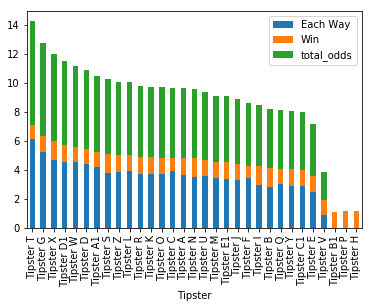

In [64]:
ranking.plot(kind='bar',stacked=True)
plt.show()

The graph above indicates that for the most part, Total Odds is a strong, weighted indicator of performance (when considering win percentages). Of note, is that the Each Way & Win weighted odds vary among tipsters. So if Bet Type becomes another stratification, the rankings change accordingly

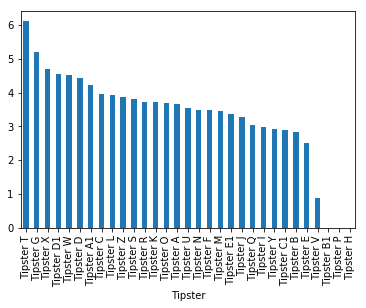

In [65]:
ranking = ranking.sort_values(by=['Each Way'], ascending=False)
ranking['Each Way'].plot(kind='bar')
plt.show()

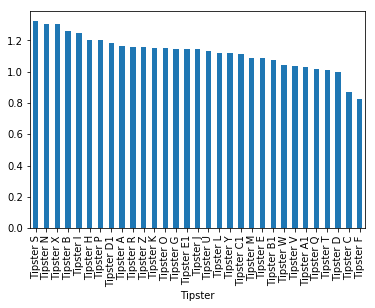

In [66]:
ranking = ranking.sort_values(by=['Win'],ascending=False)
ranking['Win'].plot(kind='bar')
plt.show()

The "Win" bets perfectly illustrate this phenomenon, where, keeping the order of the Total Odds rankings, it's clear that you can receive better odds (adjusted for win %) from a different system. 